In [90]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [65]:
cancer_df=pd.read_csv('/Users/vishweshpv/Coding/Python/Cancer preditction model/Cancer_Data.csv')
cancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [66]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [67]:
cancer_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [68]:
cancer_df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [69]:
cancer_df=cancer_df.drop(columns=['Unnamed: 32'])
cancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [70]:
X=cancer_df.drop(columns=['id','diagnosis'])
y=cancer_df.diagnosis

In [71]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [72]:
def transfrom_diagnosis(x):
    if x=='M':
        return 1
    else:
        return 0

y=y.apply(transfrom_diagnosis)
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [73]:
X_train,x_test,y_train,y_test=train_test_split(X_scaled,y,train_size=0.2,random_state=42)

In [74]:
X_train

array([[0.55038099, 0.35644234, 0.54115127, ..., 0.51202749, 0.15296669,
        0.1257379 ],
       [0.21340338, 0.16503213, 0.20869325, ..., 0.25536082, 0.2712399 ,
        0.24111242],
       [0.47654882, 0.31687521, 0.48103103, ..., 0.87388316, 0.3043564 ,
        0.2333071 ],
       ...,
       [0.34592267, 0.2404464 , 0.32140142, ..., 0.11453608, 0.17602996,
        0.04040404],
       [0.33125089, 0.33513696, 0.32706793, ..., 0.62783505, 0.31815494,
        0.33097206],
       [0.24605992, 0.36557322, 0.23101375, ..., 0.25536082, 0.22255076,
        0.090122  ]])

In [75]:
params_selector={
    'LogisticRegression':{
        'model':LogisticRegression(),
        'params':{
            'C':[1,10,100],
            'penalty':['l1', 'l2', 'elasticnet'],
            'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
            'multi_class':['auto', 'ovr', 'multinomial'],
            'max_iter':[1,10,100,1000]
        }
    },
    'SVC':{
        'model':SVC(),
        'params':{
            'C':[1,10,100,1000],
            'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma':['scale', 'auto']
        }
    },
    'KNeighborsClassifier':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[1,5,10,20,40,80,100],
            'weights':['uniform', 'distance'],
            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
        }
    },
    'GaussianNB':{
        'model':GaussianNB(),
        'params':{
            'var_smoothing':[1e-10,1e-9,1e-8,1e-7,1e-6]
        }
    },
    'MultinomialNB':{
        'model':MultinomialNB(),
        'params':{
            'alpha':[0.0001,0.001,0.01,0.1,1,10]
        }
    },
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini', 'entropy', 'log_loss'],
            'splitter':['best', 'random'],
            'max_features':['auto', 'sqrt', 'log2']
        }
    },
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,10,100,1000],
            'criterion':['gini', 'entropy', 'log_loss'],
            'class_weight':['balanced', 'balanced_subsample'],
            'max_features':['sqrt', 'log2']
        }
    },
    'MLPClassifier':{
        'model':MLPClassifier(),
        'params':{
            'activation':['relu', 'identity', 'logistic', 'tanh'],
            'solver':['lbfgs', 'sgd', 'adam'],
            'learning_rate':['constant', 'invscaling', 'adaptive']
        }
    }
}
results={}
for model_name,model_param in params_selector.items():
    gridsearch=GridSearchCV(
        estimator=model_param['model'],
        param_grid=model_param['params'],
        cv=5,
        scoring='accuracy',
        n_jobs=10,
        verbose=1
    )
    gridsearch.fit(X_train,y_train)
    results[model_name]={
        'best_score':gridsearch.best_score_,
        'best_estimator':gridsearch.best_estimator_,
        'best_params':gridsearch.best_params_
    }

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value 

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 56 candidates, totalling 280 fits


/opt/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>...
        pos_label=pos_label,
    )
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits


/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_

In [ ]:
results_df=pd.DataFrame(results)
results_df

,LogisticRegression,SVC,KNeighborsClassifier,GaussianNB,MultinomialNB,DecisionTreeClassifier,RandomForestClassifier,MLPClassifier
best_score,0.973518,0.964427,0.937945,0.910672,0.831225,0.902767,0.93834,0.964427
best_estimator,"LogisticRegression(C=10, max_iter=10, multi_cl...","SVC(C=1000, kernel='linear')",KNeighborsClassifier(),GaussianNB(var_smoothing=1e-10),MultinomialNB(alpha=0.0001),DecisionTreeClassifier(max_features='sqrt'),"(DecisionTreeClassifier(criterion='log_loss', ...","MLPClassifier(activation='identity', learning_..."
best_params,"{'C': 10, 'max_iter': 10, 'multi_class': 'auto...","{'C': 1000, 'gamma': 'scale', 'kernel': 'linear'}","{'algorithm': 'auto', 'n_neighbors': 5, 'weigh...",{'var_smoothing': 1e-10},{'alpha': 0.0001},"{'criterion': 'gini', 'max_features': 'sqrt', ...","{'class_weight': 'balanced', 'criterion': 'log...","{'activation': 'identity', 'learning_rate': 'a..."


In [81]:
model=LogisticRegression(C=10,max_iter=10,multi_class='auto',penalty='l2',solver='lbfgs')

In [82]:
model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, max_iter=10, multi_class='auto')

In [87]:
y_pred=model.predict(x_test)

In [85]:
model.score(x_test,y_test)

0.9780701754385965

In [91]:
cm=confusion_matrix(y_test,y_pred)

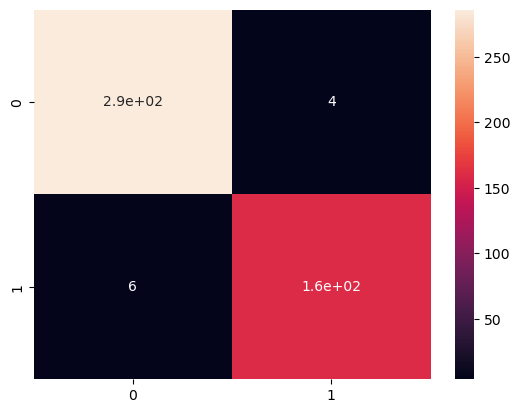

In [93]:
sns.heatmap(cm,annot=True)
plt.show()